In [62]:
# 필요 라이브러리 가져오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# (1) 데이터 가져오기
# 데이터 경로
file_path = '~/data/data/bike-sharing-demand/train.csv'

# CSV 파일을 DataFrame으로 읽기
train = pd.read_csv(file_path)

# 데이터 확인
print(train.head(2))

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  


In [63]:
# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

# datetime 컬럼을 datetime 자료형으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])


# 연, 월, 일, 시, 분, 초 컬럼 생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

# 생성된 컬럼을 카테고리형으로 변환
train['year'] = train['year'].astype('category')
train['month'] = train['month'].astype('category')
train['day'] = train['day'].astype('category')
train['hour'] = train['hour'].astype('category')
train['minute'] = train['minute'].astype('category')
train['second'] = train['second'].astype('category')

# 결과 확인
print(train.head(2))
print(train.dtypes)

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  year month day hour minute  \
0        81        0.0       3          13     16  2011     1   1    0      0   
1        80        0.0       8          32     40  2011     1   1    1      0   

  second  
0      0  
1      0  
datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                category
month               category
day                 category
hour                category
minute              categor

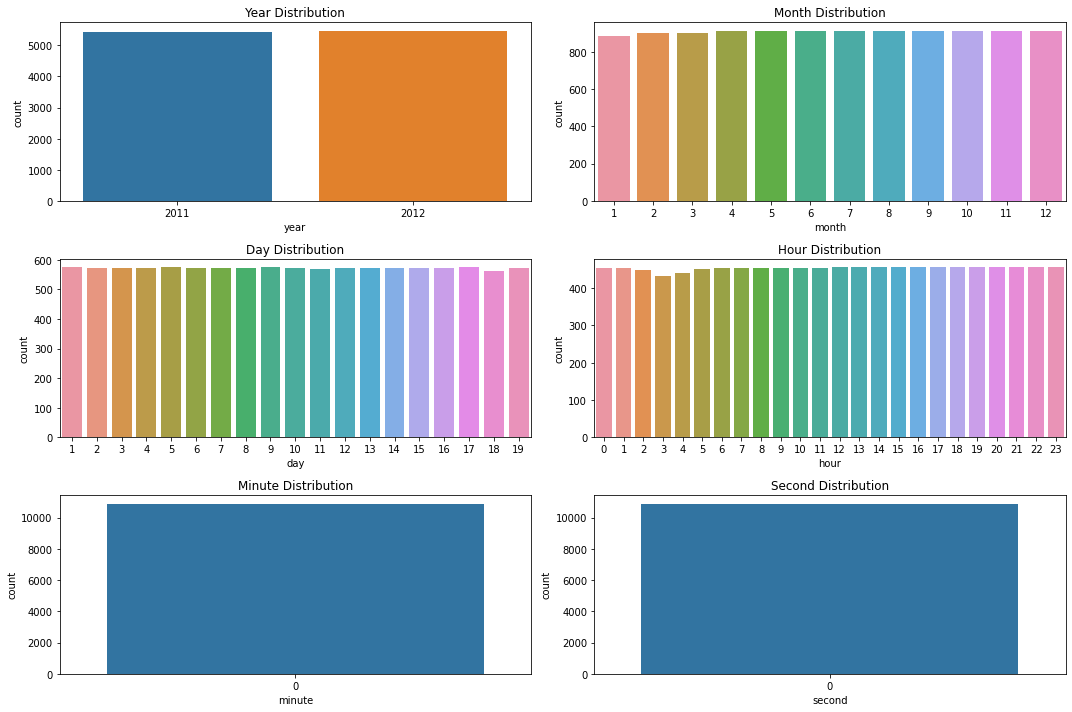

In [64]:
# (3) -1 year, month, day, hour, minute, second 데이터 개수 시각화하기
# 데이터 개수 시각화
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# year 데이터 개수 시각화
sns.countplot(data=train, x='year', ax=axs[0, 0])
axs[0, 0].set_title('Year Distribution')

# month 데이터 개수 시각화
sns.countplot(data=train, x='month', ax=axs[0, 1])
axs[0, 1].set_title('Month Distribution')

# day 데이터 개수 시각화
sns.countplot(data=train, x='day', ax=axs[1, 0])
axs[1, 0].set_title('Day Distribution')

# hour 데이터 개수 시각화
sns.countplot(data=train, x='hour', ax=axs[1, 1])
axs[1, 1].set_title('Hour Distribution')

# minute 데이터 개수 시각화
sns.countplot(data=train, x='minute', ax=axs[2, 0])
axs[2, 0].set_title('Minute Distribution')

# second 데이터 개수 시각화
sns.countplot(data=train, x='second', ax=axs[2, 1])
axs[2, 1].set_title('Second Distribution')

# 레이아웃 조정
plt.tight_layout()
plt.show()

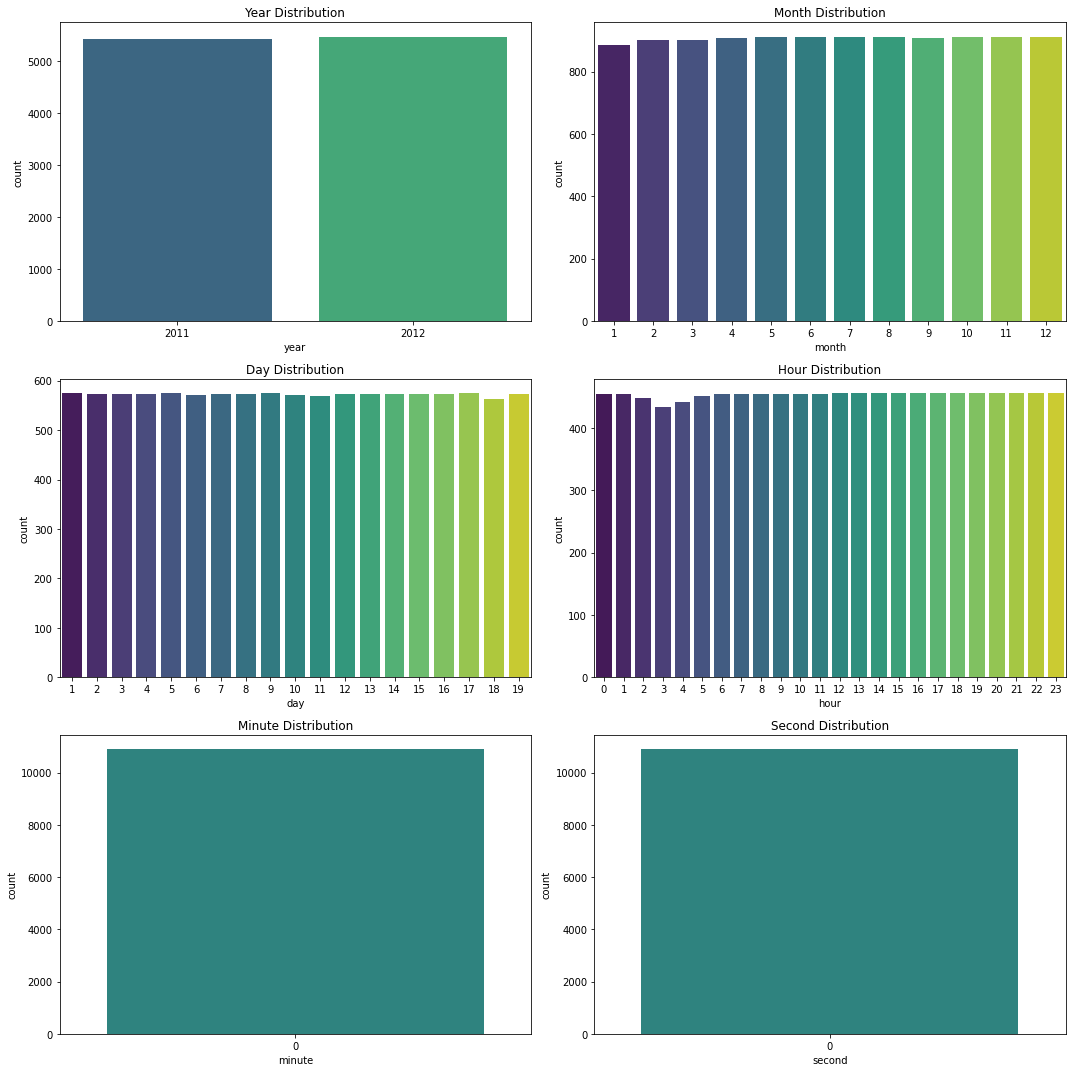

In [65]:
# (3) -1 서브플롯 생성
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# year 데이터 개수 시각화
sns.countplot(data=train, x='year', ax=axs[0, 0], palette='viridis')
axs[0, 0].set_title('Year Distribution')

# month 데이터 개수 시각화
sns.countplot(data=train, x='month', ax=axs[0, 1], palette='viridis')
axs[0, 1].set_title('Month Distribution')

# day 데이터 개수 시각화
sns.countplot(data=train, x='day', ax=axs[1, 0], palette='viridis')
axs[1, 0].set_title('Day Distribution')

# hour 데이터 개수 시각화
sns.countplot(data=train, x='hour', ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('Hour Distribution')

# minute 데이터 개수 시각화
sns.countplot(data=train, x='minute', ax=axs[2, 0], palette='viridis')
axs[2, 0].set_title('Minute Distribution')

# second 데이터 개수 시각화
sns.countplot(data=train, x='second', ax=axs[2, 1], palette='viridis')
axs[2, 1].set_title('Second Distribution')

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [66]:
# (4) X, y 컬럼 선택 및 train/test 데이터 분리
X = train[['season',  'holiday',  'workingday',  'weather',  'temp',   'atemp',
          'humidity', 'windspeed',  'year',  'month',  'day',  'hour', 'minute',  'second']].values
y = train['count'].values



# train데이터와 test데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 데이터 타입 확인
print(X_train_df.dtypes)


(8708, 14) (8708,)
(2178, 14) (2178,)
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
dtype: object


In [67]:
# sklearn의 LinearRegression 모델 불러오기 및 학습하기

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [68]:
#학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
predictions = model.predict(X_test)
print ("예측값:", predictions)

#손실함수 값
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print ("mse:", mse)

rmse = mse ** 0.5
print("rmse:", rmse)

예측값: [248.10627003  48.79765547 200.90676727 ... 309.7528022   38.17030198
 243.62697388]
mse: 19945.370053754086
rmse: 141.22807813517142


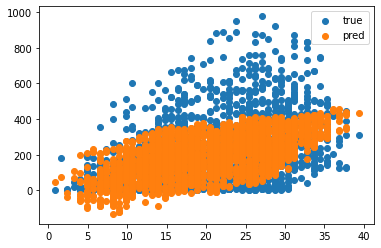

In [69]:
# x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], predictions, label="pred")
plt.legend()
plt.show()


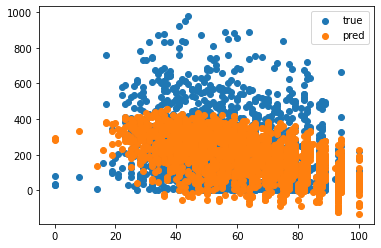

In [70]:
#x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.scatter(X_test[:,6], y_test, label = "true")
plt.scatter(X_test[:,6], predictions,label = "pred")
plt.legend()
plt.show()